# Yolov8n-pose

Using Yolov8n to detect human poses.

### Constants

In [161]:
from utils.constants import KEYPOINTS_NUM

### Importing Coco model

In [162]:
from ultralytics import YOLO

# Load a model

# Options:
# yolov8n-pose.pt
# yolov8s-pose.pt
# yolov8m-pose.pt
# yolov8l-pose.pt
# yolov8x-pose.pt
# yolov8x-pose-p6.pt

model_version = 'yolov8x-pose-p6.pt'

pose_model = YOLO('../assets/coco_model/' + model_version)

### Utils functions

#### Libraries

In [163]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#### Get keypoints from image using Yolov8n

In [164]:
def get_keypoints(image_path):
    predictions_batch = pose_model(image_path)
    
    predictions = predictions_batch[0]
    
    if len(predictions) == 0:
        return None
    
    keypoints = []
    
    for prediction in predictions:
        pred_keypoints = prediction.keypoints
        pred_keypoints_tensor = pred_keypoints.data
        pred_keypoints = pred_keypoints_tensor.numpy()

        keypoints.append(pred_keypoints.tolist()[0])
    
    return keypoints

### Usage

In [165]:
from utils.draw import draw_image_with_keypoints

def yolo_keypoints(image_path, show_image=False):
    keypoints = get_keypoints(image_path)
    
    if show_image:
        draw_image_with_keypoints(image_path, keypoints)


image 1/1 D:\jiu_dataset\images\0504230.jpg: 768x1280 2 persons, 2076.7ms
Speed: 6.0ms preprocess, 2076.7ms inference, 1.0ms postprocess per image at shape (1, 3, 768, 1280)


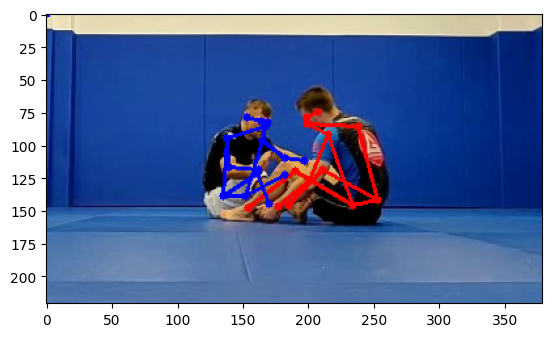

In [166]:
yolo_keypoints("D:\\jiu_dataset\\images\\0504230.jpg", show_image=True)